Fellhipe Lorenzzo Gutierrez Fonseca


# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

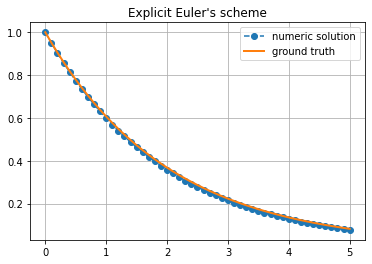

In [ ]:
lam = -0.5
plt.title('Explicit Euler\'s scheme')
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

T:  0.4 Mean abs error:  0.029368594184516962
T:  0.7 Mean abs error:  0.05177882284180405
T:  1.0 Mean abs error:  0.07436842381550283
T:  1.3 Mean abs error:  0.10536916034538554
T:  1.6 Mean abs error:  0.12348585885032237


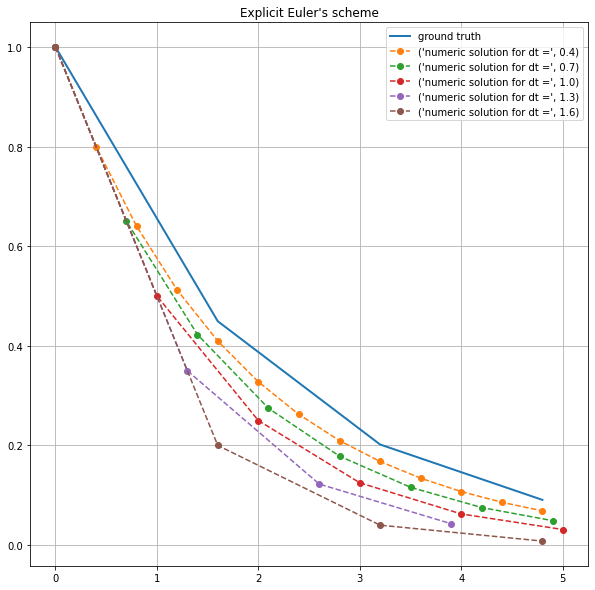

In [ ]:
# ... ENTER YOUR CODE HERE ...
plt.figure(figsize=(10,10))
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
for kk in range (4,19,3):
  lam = -0.5
  tt, y = euler_solve(lam, u0=1.0, T=5, dt=kk/10)
  dt = kk/10
  print("T: ", dt, "Mean abs error: ", mean_absolute_error(np.exp(lam*tt), y))
  plt.title('Explicit Euler\'s scheme')
  plt.plot(tt, y, 'o--', label=('numeric solution for dt =', kk/10))
  #plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
  
  plt.legend(loc='best')  
  plt.grid(True)

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [ ]:
# ... ENTER YOUR CODE AND DISCUSSION HERE ...
def implicit_euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k+1]
    return tt, y


Mean abs error for T: 0.4  is: 0.6071604755804061
Mean abs error for T: 0.7  is: 0.6024584919042897
Mean abs error for T: 1.0  is: 0.5975065761844972
Mean abs error for T: 1.3  is: 0.5157870896546145
Mean abs error for T: 1.6  is: 0.5645141411496777


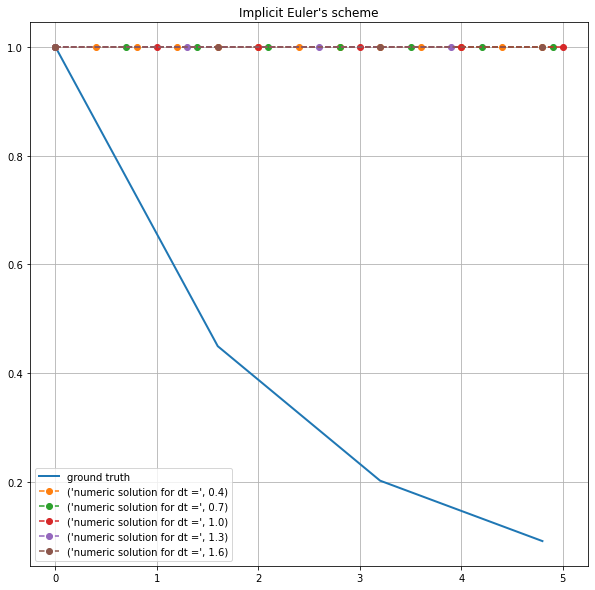

In [ ]:
# ... ENTER YOUR CODE HERE ...
from sklearn.metrics import mean_absolute_error
plt.figure(figsize=(10,10))
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
for kk in range (4,19,3):
  lam = -0.5
  dt = kk/10
  tt, y = implicit_euler_solve(lam, u0=1.0, T=5, dt=kk/10)
  plt.title('Implicit Euler\'s scheme')
  plt.plot(tt, y, 'o--', label=('numeric solution for dt =', kk/10))
  #plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
  plt.legend(loc='best') 
  print("Mean abs error for T:", dt, " is:", mean_absolute_error(np.exp(lam*tt), y))
  plt.grid(True)

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [ ]:

# ... ENTER YOUR CODE HERE ...

def system_euler_solve_explicit(A, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u0.shape[0]))
    #print(num_steps+1, u0.shape[0])
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*A@y[k]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
A = np.array([[-10, 10], [32, -499]])
u = np.array([1,0])
tt, y = system_euler_solve_explicit(A, u, 5, 0.01)
print(y)

print(np.linalg.eigvals(A))

[[ 1.00000000e+000  0.00000000e+000]
 [ 9.00000000e-001  3.20000000e-001]
 [ 8.42000000e-001 -9.88800000e-001]
 ...
 [ 5.79760589e+296 -2.83881815e+298]
 [-2.31703362e+297  1.13454368e+299]
 [ 9.26010650e+297 -4.53424377e+299]]
[  -9.34647667 -499.65352333]


The explicit Euler's method is indeed stable with the given step size, because the stability condition for this method is given by  $ 0 < \tau < \dfrac{2}{|\lambda |} $, therefore, with $\tau = 0.01$ the condition holds, since $0.01 < \dfrac{2}{|0.5|}$, then $0.01 < 4 $ is true.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
# http://www.ees.nmt.edu/outside/courses/hyd510/PDFs/Lecture%20notes/Lectures%20Part%202.7%20SimultODE.pdf p. 164
def system_euler_solve_implicit(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u0.shape[0]))
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = np.linalg.solve((np.eye(A.shape[0])-dt*A), y[k])
    return tt, y

In [ ]:
# ... ENTER YOUR CODE HERE ...
A = np.array([[-10, 10], [32, -499]])
u = np.array([1,0])
tt, y = system_euler_solve_implicit(A, u, 5, 0.01)
print(y)
print(np.linalg.eigvals(A))

[[1.00000000e+00 0.00000000e+00]
 [9.13527528e-01 4.88028062e-02]
 [8.35276830e-01 5.27698484e-02]
 ...
 [4.72752013e-20 3.08954469e-21]
 [4.32343161e-20 2.82546341e-21]
 [3.95388287e-20 2.58395469e-21]]
[  -9.34647667 -499.65352333]


# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

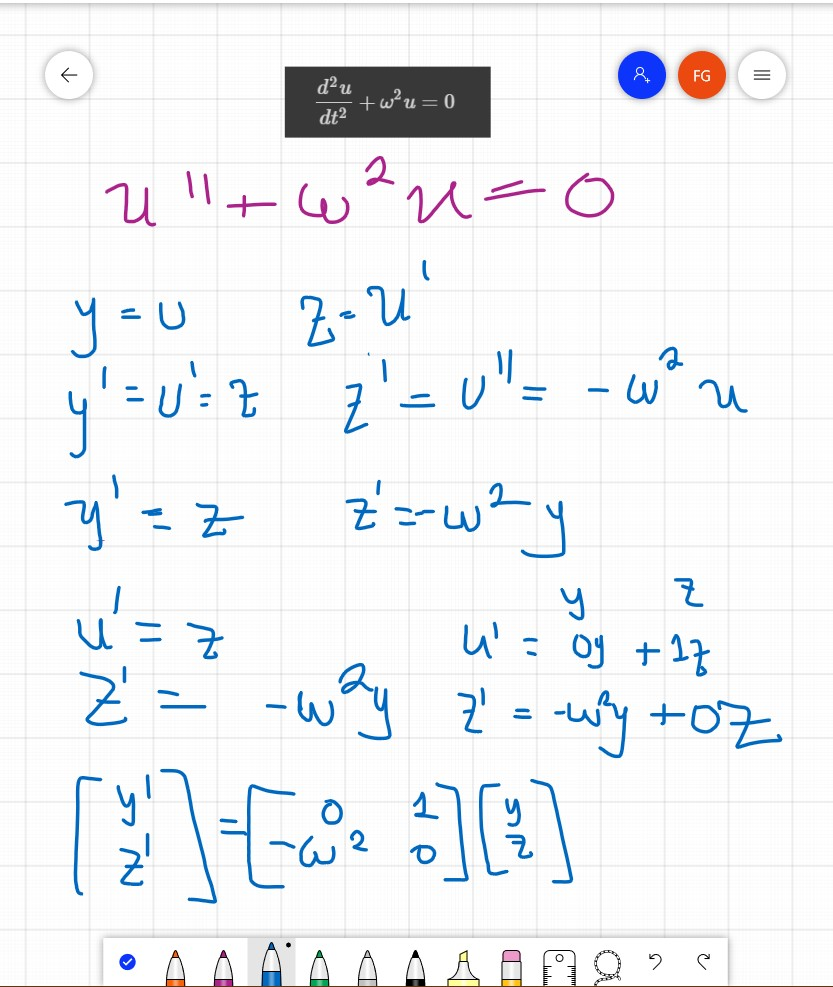

In [ ]:
# ... ENTER YOUR CODE HERE ...
def oscillating_pendulum_explicit(w, u0, T, dt):
    A = np.array([[0, 1], [-w**2, 0]])
    return system_euler_solve_explicit(A, u0, T, dt)

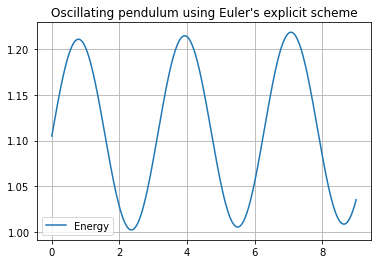

In [ ]:
def energy(u, du, w):
  return (du**2)/2 + ((w**2)*(u**2))/2

tt,y = oscillating_pendulum_explicit(1, np.array([1,1]), 9, 0.001)

tt_y = energy(y[:,0], y[:, 1], 1.1)
plt.title('Oscillating pendulum using Euler\'s explicit scheme')
plt.plot(tt, tt_y, label = "Energy");
plt.legend(loc='best')
plt.grid(True)

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def runge_kutta_scheme(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros((num_steps+1, u0.shape[0]))
    y[0] = u0
    for k in range(num_steps):
        b1 = A@y[k]
        b2 = A@(y[k]+dt/2*b1)
        y[k+1] = dt*b2+y[k]
    return tt, y

In [ ]:
def oscillating_pendulum_runge_kutta(w, u0, T, dt):
    A = np.array([[0, 1], [-w**2, 0]])
    return runge_kutta_scheme(A, u0, T, dt)

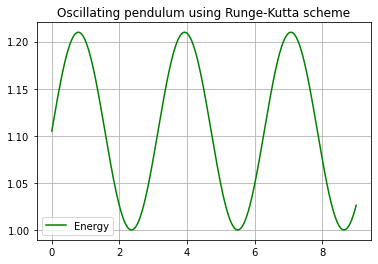

In [ ]:

tt,y = oscillating_pendulum_runge_kutta(1, np.array([1,1]), 9, 0.001)

tt_y = energy(y[:,0], y[:, 1], 1.1)
plt.title('Oscillating pendulum using Runge-Kutta scheme')
plt.plot(tt, tt_y, label = "Energy", color='green');
plt.legend(loc='best')
plt.grid(True)

Energy is conserved